# Fig 2C Plot of BOLD levels during vibrotactile stimulation

In [1]:
import numpy as np
import os 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy
import scipy.io as sio
from scipy import stats
import seaborn as sns
dirpath = os.getcwd()
#from statannot import add_stat_annotation

from utils import adjust_box_widths
from matplotlib.patches import PathPatch


In [2]:
# Load excel data once, then only change index x1.parse(index)
lbl = ['Condition','Beta estimate','Digit','SubjID']
cond = ['Congruent','Incongruent','Uninformative']
cl = np.repeat(cond,2)
dl = np.tile(['Ring finger', 'Thumb'],3)
print(dl)
beta_df = pd.DataFrame(columns=lbl)
dirpath = 'Betas_averages'
subjid = np.arange(25)

for con in range(6):
    bf = sio.loadmat(os.path.join(dirpath,'orig_mean_betas_'+str(con+1)+'.mat'))
    
    new = pd.DataFrame(columns=beta_df.columns)
    new[lbl[0]] = np.repeat(cl[con],len(subjid))
    new[lbl[1]] = bf['mean_betas'][0]
    new[lbl[2]] = np.repeat(dl[con],len(subjid))
    new[lbl[3]] = subjid
    beta_df = pd.concat([beta_df, new], ignore_index=True)

['Ring finger' 'Thumb' 'Ring finger' 'Thumb' 'Ring finger' 'Thumb']


In [3]:
df_con = beta_df.loc[beta_df['Condition']=="Congruent"].groupby('SubjID').mean()
df_con["Condition"] = "Congruent"

df_inc = beta_df.loc[beta_df['Condition']=="Incongruent"].groupby('SubjID').mean()
df_inc["Condition"] = "Incongruent"

df_uninf = beta_df.loc[beta_df['Condition']=="Uninformative"].groupby('SubjID').mean()
df_uninf["Condition"] = "Uninformative"

beta_df = pd.concat([df_con,df_inc,df_uninf])
beta_df = beta_df.reset_index()

/var/folders/b7/k9l5l5ss13d27wd57vb8fq4w0000gn/T/ipykernel_50924/3654266143.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_con = beta_df.loc[beta_df['Condition']=="Congruent"].groupby('SubjID').mean()
/var/folders/b7/k9l5l5ss13d27wd57vb8fq4w0000gn/T/ipykernel_50924/3654266143.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_inc = beta_df.loc[beta_df['Condition']=="Incongruent"].groupby('SubjID').mean()
/var/folders/b7/k9l5l5ss13d27wd57vb8fq4w0000gn/T/ipykernel_50924/3654266143.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nu

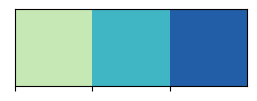

In [4]:
current_palette = sns.color_palette("YlGnBu", 3)
sns.palplot(current_palette)
pcon = {"Congruent":current_palette[2],"Incongruent":current_palette[1],"Uninformative":current_palette[0]}

In [5]:
def significance(tick_value, data_ratio, max_value, text='***',offset=0.13, fontsize=20):
    hanbun_min = tick_value - data_ratio/2
    hanbun_max = tick_value + data_ratio/2
    plt.text(tick_value,max_value+0.2,text,bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':0.3},
          ha='center', va='center', fontsize=fontsize)
    #top line
    plt.plot([hanbun_min,hanbun_max],[max_value+offset-0.003,max_value+offset-0.003],'k',linewidth=1)
    #side lines
    plt.plot([hanbun_min,hanbun_min],[max_value+offset-0.003,max_value+offset-0.1],'k',linewidth=1)
    plt.plot([hanbun_max,hanbun_max],[max_value+offset-0.003,max_value+offset-0.1],'k',linewidth=1)
def draw_line(y1,y2,y3,x1=0,x2=1,x3=2):
    plt.plot([x1,x2,x3],[y1,y2,y3],color='lightgrey',ls='-',linewidth=0.7)

In [6]:
num = int(len(beta_df)/3)
beta_data_frame = beta_df.copy();
beta_data_frame['Beta estimate'] = beta_data_frame['Beta estimate']*100
estimates = beta_data_frame['Beta estimate']
data_list = []
for i in range(0,num):
    data_list.append([float(estimates[i]),float(estimates[i+num]), float(estimates[i+num*2])])



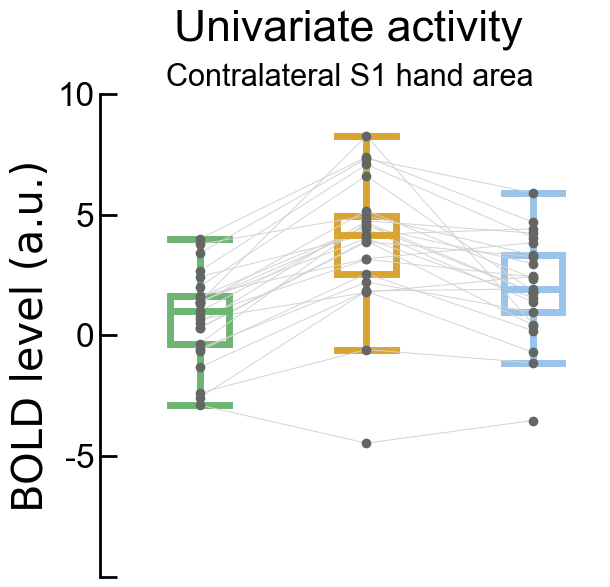

In [7]:
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'mediumblue','alpha': 1},
    'medianprops':{'color':'cornflowerblue','alpha': 1},
    'whiskerprops':{'color':'cornflowerblue','alpha': 1},
    'capprops':{'color':'cornflowerblue','alpha': 1}
}

#colors for the dots
colors_box = ["#03818A", "#D4B611", "#68b9d4"]
colors_box = ["#6eb574", "#d9a432",'#99c3e8' ]

colors =  ["#777d7d", "#777d7d", "#777d7d"]
x = 'Condition'
y = 'Beta estimate'

boxplot = sns.boxplot(
    data=beta_data_frame,
    x=x,
    y=y,
    fliersize=0,
    palette=colors_box,
    width=0.7,
    linewidth=5,
    **PROPS
)

#CHANGE BOXPLOT STYLE

box_patches = [patch for patch in boxplot.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = boxplot.artists
    
num_patches = len(box_patches)
lines_per_boxplot = len(boxplot.lines) // num_patches

for i, patch in enumerate(box_patches):
    
    col = colors_box[i%3]
    patch.set_edgecolor(col)
    patch.set_facecolor('None')
    
    for line in boxplot.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        
        
#END CHANGE BOXPLOT STYLE

#Setting the size of the points using size param
ax = sns.stripplot(
    data=beta_data_frame,
    x=x,
    y=y,
    jitter=0,
    size=7,
    color="#646664",
    dodge=True,
)


for row in data_list:
    draw_line(row[0],row[1],row[2])

#significance(0.5,1,9.3,text="****",fontsize=10)
#significance(1,2,10.2,text="***",fontsize=10)
#significance(1.5,1,11.1,text="***",fontsize=10)
#significance(1,1,11,text="***",fontsize=12)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(2)


ax.set_ylim([-5,10])
ax.set_ylim([-10,10])
ax.set_yticks([-10,-5,0,5,10], fontname='Arial')
ax.set_yticklabels(['','-5','0','5','10'],fontname='Arial')


ax.set_xlim([-0.6,2.4])

ax.set_xlabel("",fontsize=11)
ax.set_xticklabels(['Congruent','Incongruent','Uninformative'], fontsize = 18, fontname='Arial')
ax.set_xticklabels(['','', ''], fontsize=18, fontname='Arial')

ax.tick_params(axis='y',labelsize=10)


plt.suptitle('Univariate activity', x=0.57,  fontsize = 32, fontname='Arial', y =0.97)
plt.title('Contralateral S1 hand area', loc = 'center', fontsize = 22,fontname='Arial', y =1)
ax.set_ylabel("BOLD level (a.u.)",fontsize=30)

ax.tick_params(axis='y', which='major', direction='in',length=12, labelsize=24, width=2)

fig = ax.get_figure()
fig.set_size_inches([6.2,6])
plt.tick_params(bottom = False)
plt.tight_layout()
fig.tight_layout()

adjust_box_widths(fig, 0.5)

fig.savefig("Fig2C.jpg",dpi=500)
plt.savefig("Fig2C.eps", format='eps')

## Export data

In [11]:
beta_df.to_csv("fig2c_output.csv",index=False)